In [9]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [18]:
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

In [22]:
print(X_train[:10])
print(y_train[:10])

[[ 4.33 -1.99]
 [ 4.1  -2.31]
 [ 4.5  -2.19]
 [-5.4   3.02]
 [ 4.22 -0.03]
 [ 3.76 -3.61]
 [ 7.19 -2.76]
 [ 5.44 -1.41]
 [ 1.6   1.63]
 [-5.03  3.39]]
[3 3 3 0 3 3 3 3 2 0]


/Users/yutowilliam/Git/ML_AndrewNg/Neural_Network/W2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


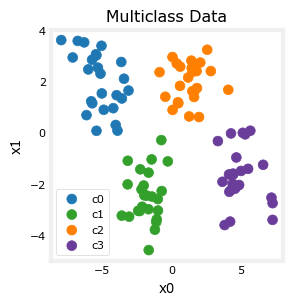

In [21]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [23]:
tf.random.set_seed(1234)
Model = Sequential(
    [
        Dense(2, activation='relu', name='L1'),
        Dense(4, activation='linear', name='L2')
    ]
)

Model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

Model.fit(
    X_train, y_train,
    epochs=200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9781  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.9163
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.8714
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.8339
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 0.8014
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.7731
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.7471
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.7229
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.7011
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.6809
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.6622
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.6447
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.6283
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.6129
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.5984
Epoc

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step


/Users/yutowilliam/Git/ML_AndrewNg/Neural_Network/W2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


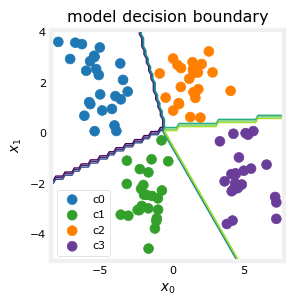

In [24]:
plt_cat_mc(X_train, y_train, Model, classes)

In [26]:
l1 = Model.get_layer('L1')
w1, b1 = l1.get_weights()
w1, b1

(array([[ 0.75,  2.13],
        [-2.78,  0.96]], dtype=float32),
 array([1.99, 2.18], dtype=float32))

In [27]:
w1.shape

(2, 2)

/Users/yutowilliam/Git/ML_AndrewNg/Neural_Network/W2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/yutowilliam/Git/ML_AndrewNg/Neural_Network/W2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


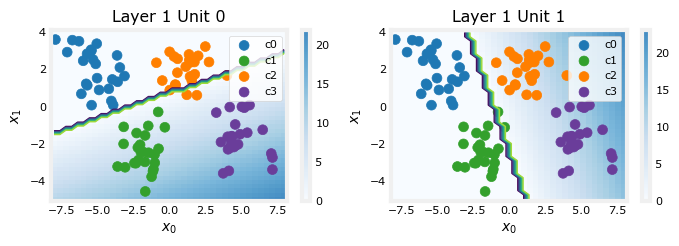

In [30]:
plt_layer_relu(X_train, y_train.reshape(-1,), w1, b1, classes)

* Unit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will output a value greater than zero.
Unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a zero, while points below will output a value greater than zero. Let's see how this works out in the next layer!

/Users/yutowilliam/Git/ML_AndrewNg/Neural_Network/W2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/yutowilliam/Git/ML_AndrewNg/Neural_Network/W2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/yutowilliam/Git/ML_AndrewNg/Neural_Network/W2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/yutowilliam/Git/ML_AndrewNg/Neural_Network/W2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


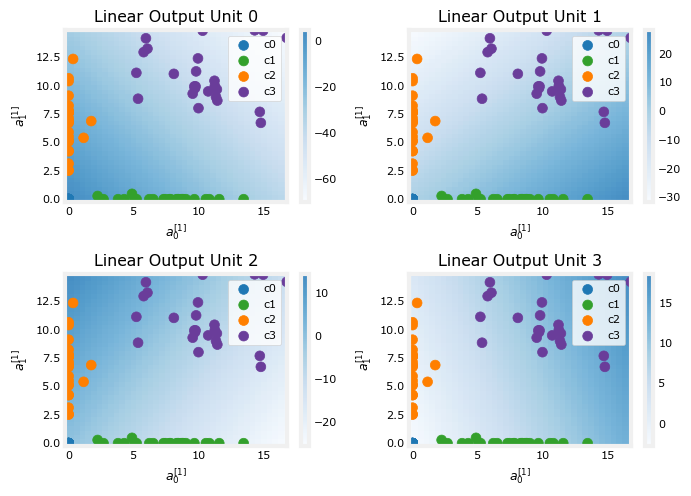

In [31]:
l2 = Model.get_layer('L2')
w2, b2 = l2.get_weights()

Xl2 = np.maximum(0, np.dot(X_train,w1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), w2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

In [29]:
w2.shape

(2, 4)